note: this notebook should be run under the same directory as `scripts`

### Euler registeration on RFP images

In [1]:
from euler_register import EulerRegistrationProcessor

In [22]:
target_image_shape = (284, 120, 64)
save_directory = "/home/alicia/notebook/alicia/BrainAlignNet/demo/euler_registered_RFP"
problem_file = "/home/alicia/notebook/alicia/BrainAlignNet/demo/registration_problems.json"

In [23]:
#  `EulerRegistrationProcessor` performs Euler registration on pairs of images in `problem_file`
processor = EulerRegistrationProcessor(
    target_image_shape,
    save_directory,
    problem_file)

processor.process_datasets()

=====Processing 2022-03-31-01 in train=====


  0%|                                                                              | 0/10 [00:00<?, ?it/s]/home/flv_admin/Dropbox/AllNotebook/alicia/euler_gpu/euler_gpu/gncc.py:50: RuntimeWarning: invalid value encountered in scalar divide
  return a / b
 10%|███████                                                               | 1/10 [00:03<00:30,  3.44s/it]

eulergpu_outcomes written under resources.
center_of_mass written under resources.
euler_parameters written under resources.


 20%|██████████████                                                        | 2/10 [00:06<00:27,  3.40s/it]

eulergpu_outcomes written under resources.
center_of_mass written under resources.
euler_parameters written under resources.


 30%|█████████████████████                                                 | 3/10 [00:10<00:23,  3.39s/it]

eulergpu_outcomes written under resources.
center_of_mass written under resources.
euler_parameters written under resources.


 40%|████████████████████████████                                          | 4/10 [00:13<00:20,  3.35s/it]

eulergpu_outcomes written under resources.
center_of_mass written under resources.
euler_parameters written under resources.


 50%|███████████████████████████████████                                   | 5/10 [00:16<00:16,  3.31s/it]

eulergpu_outcomes written under resources.
center_of_mass written under resources.
euler_parameters written under resources.


 60%|██████████████████████████████████████████                            | 6/10 [00:20<00:13,  3.31s/it]

eulergpu_outcomes written under resources.
center_of_mass written under resources.
euler_parameters written under resources.


 70%|█████████████████████████████████████████████████                     | 7/10 [00:23<00:09,  3.30s/it]

eulergpu_outcomes written under resources.
center_of_mass written under resources.
euler_parameters written under resources.


 80%|████████████████████████████████████████████████████████              | 8/10 [00:26<00:06,  3.30s/it]

eulergpu_outcomes written under resources.
center_of_mass written under resources.
euler_parameters written under resources.


 90%|███████████████████████████████████████████████████████████████       | 9/10 [00:29<00:03,  3.30s/it]

eulergpu_outcomes written under resources.
center_of_mass written under resources.
euler_parameters written under resources.


100%|█████████████████████████████████████████████████████████████████████| 10/10 [00:33<00:00,  3.32s/it]

eulergpu_outcomes written under resources.
center_of_mass written under resources.
euler_parameters written under resources.


eulergpu_outcomes written under resources.
center_of_mass written under resources.
euler_parameters written under resources.


#### RFP images after registration

In [26]:
import matplotlib.pyplot as plt
import h5py
import random

problems registered: ['1to198', '1to335', '1to382', '1to527', '1to614', '1to617', '1to619', '1to660', '1to673', '1to679']
Show problem: 1to335


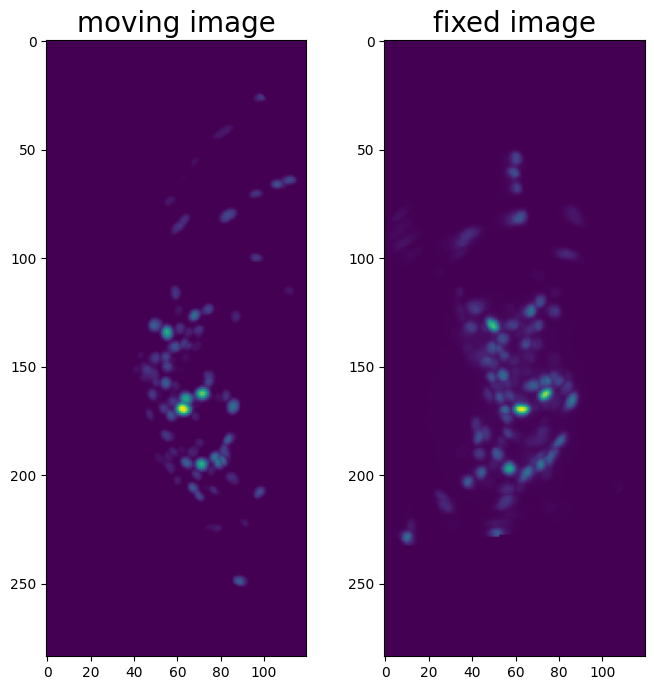

In [27]:
with h5py.File(f"{save_directory}/train/nonaugmented/2022-03-31-01/moving_images.h5", "r") as f:
    problems = list(f.keys())
print(f"problems registered: {problems}")

problem = random.choice(problems)
print(f"Show problem: {problem}")

with h5py.File(f"{save_directory}/train/nonaugmented/2022-03-31-01/moving_images.h5", "r") as f:
    moving_image = f[problem][:]

with h5py.File(f"{save_directory}/train/nonaugmented/2022-03-31-01/fixed_images.h5", "r") as f:
    fixed_image = f[problem][:]

fig, axes = plt.subplots(1, 2, figsize=(8, 8))
axes[0].imshow(moving_image.max(2))
axes[0].set_title("moving image", fontsize=20);
axes[1].imshow(fixed_image.max(2))
axes[1].set_title("fixed image", fontsize=20);

### Euler registration on GFP images

In [3]:
from warp_rfp import FPImageWarper

In [5]:
target_image_shape = (284, 120, 64)
save_directory = "/home/alicia/notebook/alicia/BrainAlignNet/demo/euler_registered_GFP"
problem_file = "/home/alicia/notebook/alicia/BrainAlignNet/demo/registration_problems.json"

# `FPImageWarper` is for Euler-transforming images with known parameters
# the parameters are saved under `resources` in the current directory by running the previous cells

processor = FPImageWarper(
    target_image_shape,
    save_directory,
    problem_file)

processor.process_datasets()

=====Processing 2022-03-31-01 in train=====


100%|█████████████████████████████████████████████████████████████████████| 10/10 [01:14<00:00,  7.47s/it]


#### GFP images after Euler registration

In [12]:
import matplotlib.pyplot as plt
import h5py
import random

problems registered: ['1to198', '1to335', '1to382', '1to527', '1to614', '1to617', '1to619', '1to660', '1to673', '1to679']
Show problem: 1to660


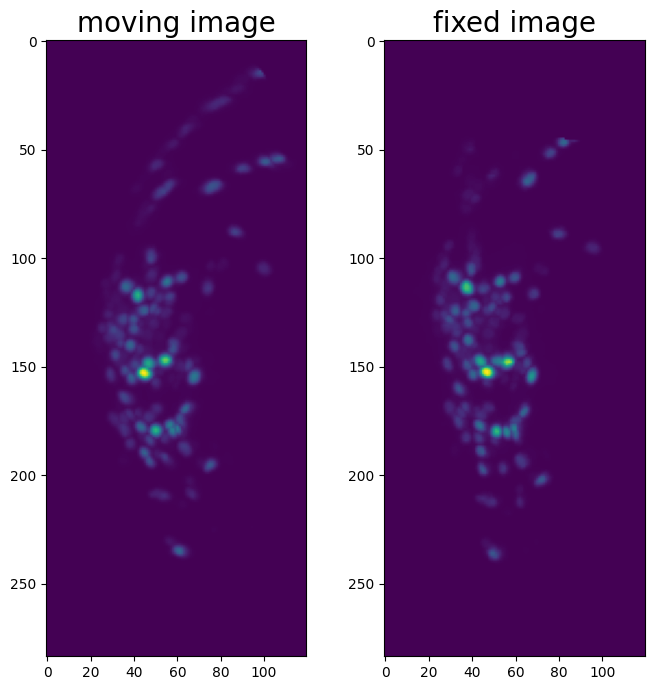

In [28]:
with h5py.File(f"{save_directory}/train/nonaugmented/2022-03-31-01/moving_images.h5", "r") as f:
    problems = list(f.keys())
print(f"problems registered: {problems}")

problem = random.choice(problems)
print(f"Show problem: {problem}")

with h5py.File(f"{save_directory}/train/nonaugmented/2022-03-31-01/moving_images.h5", "r") as f:
    moving_image = f[problem][:]

with h5py.File(f"{save_directory}/train/nonaugmented/2022-03-31-01/fixed_images.h5", "r") as f:
    fixed_image = f[problem][:]

fig, axes = plt.subplots(1, 2, figsize=(8, 8))
axes[0].imshow(moving_image.max(2))
axes[0].set_title("moving image", fontsize=20);
axes[1].imshow(fixed_image.max(2))
axes[1].set_title("fixed image", fontsize=20);

### Euler registration on ROI images

In [1]:
from warp_roi import generate_rois

2024-08-19 02:14:41.092662: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-08-19 02:14:41.092701: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-08-19 02:14:41.094083: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [2]:
device_name = "cuda:2"
target_image_shape = (284, 120, 64)
problem_file = "/home/alicia/notebook/alicia/BrainAlignNet/demo/registration_problems_roi.json"
save_directory = "/home/alicia/notebook/alicia/BrainAlignNet/demo/euler_registered_roi"

In [3]:
generate_rois(
    device_name,
    target_image_shape,
    problem_file,
    save_directory,
    True)

100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████| 2/2 [00:01<00:00,  1.20it/s]


2022-02-08-04 generated!


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████| 2/2 [00:03<00:00,  1.76s/it]


2022-04-05-01 generated!


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████| 2/2 [00:04<00:00,  2.04s/it]


2022-04-14-04 generated!
bad_registration_problems written under resources.


#### ROI images after Euler registration

In [4]:
import matplotlib.pyplot as plt
import h5py
import random

problems registered: ['147to708', '809to976']
Show problem: 147to708


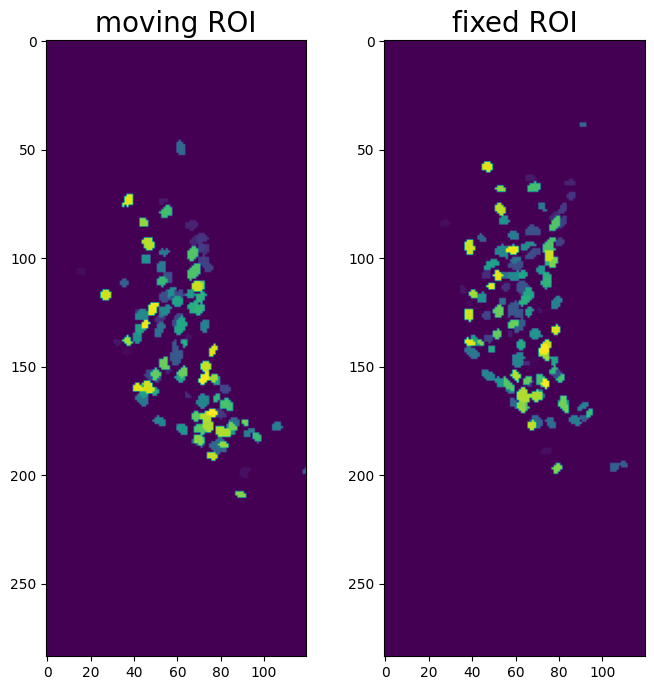

In [7]:
with h5py.File(f"{save_directory}/train/nonaugmented/2022-02-08-04/moving_rois.h5", "r") as f:
    problems = list(f.keys())
print(f"problems registered: {problems}")

problem = random.choice(problems)
print(f"Show problem: {problem}")

with h5py.File(f"{save_directory}/train/nonaugmented/2022-02-08-04/moving_rois.h5", "r") as f:
    moving_roi = f[problem][:]

with h5py.File(f"{save_directory}/train/nonaugmented/2022-02-08-04/fixed_rois.h5", "r") as f:
    fixed_roi = f[problem][:]

fig, axes = plt.subplots(1, 2, figsize=(8, 8))
axes[0].imshow(moving_roi.max(2))
axes[0].set_title("moving ROI", fontsize=20);
axes[1].imshow(fixed_roi.max(2))
axes[1].set_title("fixed ROI", fontsize=20);

### Generate centroid labels from Euler-registered ROI images

In [9]:
from label_centroids import CentroidLabel

In [10]:
dataset_path = "/home/alicia/notebook/alicia/BrainAlignNet/demo/euler_registered_roi"
centroid_labeler = CentroidLabel(dataset_path)
centroid_labeler.create_all_labels()

100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████| 2/2 [00:04<00:00,  2.21s/it]


#### ROI images with centroid labels

In [ ]:
import matplotlib.pyplot as plt
import h5py
import random

problems registered: ['147to708', '809to976']
Show problem: 147to708


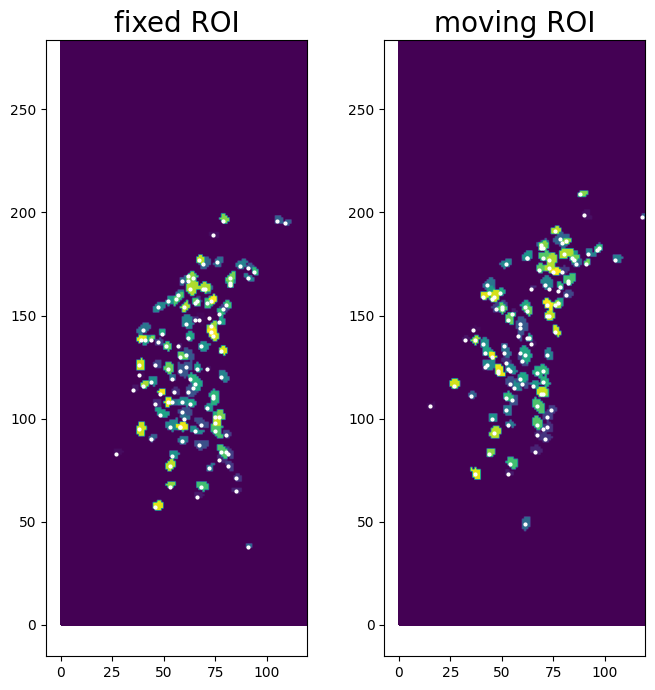

In [31]:
with h5py.File(f"{save_directory}/train/nonaugmented/2022-02-08-04/moving_rois.h5", "r") as f:
    problems = list(f.keys())
print(f"problems registered: {problems}")

problem = random.choice(problems)
print(f"Show problem: {problem}")

with h5py.File(f"{save_directory}/train/nonaugmented/2022-02-08-04/moving_rois.h5", "r") as f:
    moving_roi = f[problem][:]

with h5py.File(f"{save_directory}/train/nonaugmented/2022-02-08-04/fixed_rois.h5", "r") as f:
    fixed_roi = f[problem][:]

with h5py.File(f"{save_directory}/train/nonaugmented/2022-02-08-04/moving_labels.h5", "r") as f:
    moving_label = f[problem][:]

with h5py.File(f"{save_directory}/train/nonaugmented/2022-02-08-04/fixed_labels.h5", "r") as f:
    fixed_label = f[problem][:]

fixed_xs = [x for (x, _, _) in fixed_label]
fixed_ys = [y for (_, y, _) in fixed_label]
moving_xs = [x for (x, _, _) in moving_label]
moving_ys = [y for (_, y, _) in moving_label]

fig, axes = plt.subplots(1, 2, figsize=(8, 8))

axes[0].imshow(fixed_roi.max(2))
axes[0].set_title("fixed ROI", fontsize=20);

axes[0].scatter(moving_ys, moving_xs, s=4, c='w');
axes[0].invert_yaxis()

axes[1].imshow(moving_roi.max(2))
axes[1].set_title("moving ROI", fontsize=20);

axes[1].scatter(fixed_ys, fixed_xs, s=4,  c='w');
axes[1].invert_yaxis()